In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from src.config import DEFAULT_DATA_FOLDER
from src.data.utils import save_as_excel
from src.data.preprocessing import preprocess_text

In [2]:
cleaned_architectural_posts = pd.read_excel(f"{DEFAULT_DATA_FOLDER}/processed/cleaned_architectural_posts.xlsx")
architectural_posts = pd.read_excel(f"{DEFAULT_DATA_FOLDER}/processed/architectural_posts_details.xlsx")
architectural_posts_answers = pd.read_excel(f"{DEFAULT_DATA_FOLDER}/processed/architectural_posts_answers_details.xlsx")

In [3]:
cleaned_architectural_posts.head(10)

,URL,Purpose,Solution,postId
0,http://stackoverflow.com/questions/2669573,Evaluation,Technology,2669573
1,http://stackoverflow.com/questions/18353033,Evaluation,Technology,18353033
2,http://stackoverflow.com/questions/3442278,Evaluation,Technology,3442278
3,http://stackoverflow.com/questions/8145060,Evaluation,Feature,8145060
4,http://stackoverflow.com/questions/7390561,Evaluation,Technology,7390561
5,http://stackoverflow.com/questions/14713711,Synthesis,Feature,14713711
6,http://stackoverflow.com/questions/2096734,Evaluation,Technology,2096734
7,http://stackoverflow.com/questions/4033891,Synthesis,Technology,4033891
8,http://stackoverflow.com/questions/59677,Evaluation,Feature,59677
9,http://stackoverflow.com/questions/10051261,Analysis,Technology,10051261


In [4]:
architectural_posts.head(10)

,id,title,body,is_answered,view_count,accepted_answer_id,answer_count,score,tags
0,473932,What are the pros and cons of OleDB versus SQL...,<p>Some context: one of the systems I'm workin...,True,29513,473948.0,6,19,".net,sql-server-2005,oledb"
1,13377992,Which one to choose from STOMP/AMQP?,<p>i am using the node.js as client to jms top...,True,12627,NaN,1,10,"node.js,jms,amqp,stomp"
2,349717,Which to choose: ASP.NET MVC or RESTful WCF?,"<p>With ASP.NET MVC, it is common to have AJAX...",True,5332,350590.0,4,17,"asp.net-mvc,wcf,rest"
3,374464,Why would you use a message based system?,<p>What are the motivations for using a messag...,True,11911,374528.0,9,17,"language-agnostic,message,servicebus"
4,249200,What is the fastest webserver solution with th...,<p>I need a webserver to serve up very simple ...,True,32999,NaN,16,23,webserver
5,721708,WPF / WCF Push Notification,"<p>Does .NET 3.5 (WCF, or other) offer any typ...",True,19217,722027.0,2,14,"wcf,notifications"
6,3709987,Why would you not use WCF Data Services for qu...,"<p>OK, so we are using entity framework and wi...",True,3630,NaN,5,12,".net,wcf,entity-framework,soa,wcf-data-services"
7,6166746,Why use SOAP for webservices?,"<p>I have read a tutorial ""<a href=""http://dav...",True,20857,6168635.0,2,21,"web-services,rest,soap"
8,7390561,ZeroMQ + Protocol Buffers,"<p><a href=""http://www.zeromq.org/area%3afaq"">...",True,42118,7390868.0,4,34,"protocols,network-protocols,zeromq"
9,19090732,What does Windows Service Bus add to MSMQ?,<p>I'd like to make an informed choice towards...,True,11556,NaN,2,37,"c#,.net,msmq,publish-subscribe,servicebus"


In [5]:
architectural_posts_answers.head(10)

,question_id,answer_id,body,is_accepted,score
0,473932,473948,<p>OleDb is more generic. If you ever move to ...,True,25
1,13377992,17153905,<p>You may see a difference in performance (re...,False,3
2,349717,350590,<p>If you're already using ASP.Net MVC for the...,True,12
3,374464,374528,<p>There are multiple advantages to using mess...,True,27
4,249200,249233,<p>I've had a good experience with nginx (<a h...,False,40
5,721708,722027,"<p>Your question couldn't be any more general,...",True,22
6,3709987,3937371,<p>I think you have a valid case for Data Serv...,False,5
7,6166746,6168635,<p>When building web services you can go two w...,True,56
8,7390561,7390868,<p>If you are 100% certain that the programs t...,True,28
9,19090732,19155946,<p>The main functional difference is Service B...,False,21


In [6]:
# A post will always have a question but, their can be instances when a post can have no answers
# should we perform cleaning of texts before or after the concatenation?
merge1 = pd.merge(architectural_posts, architectural_posts_answers, how='left', left_on='id', right_on='question_id')
merge1['text'] = merge1['title'] + ' ' + merge1['body_x'].fillna("") + ' ' + merge1['body_y'].fillna("")
merge1['clean_text'] = merge1['text'].apply(preprocess_text)
posts_with_answers = merge1[['id', 'clean_text', 'is_answered', 'is_accepted', 'tags']].copy()
#merge1.head(10)

In [7]:
merge2 = pd.merge(posts_with_answers, cleaned_architectural_posts, how='left', left_on='id', right_on='postId')
merge2['is_evaluation'] = merge2['Purpose'] == "Evaluation"
merge2['is_analysis'] = merge2['Purpose'] == "Analysis"
merge2['is_synthesis'] = merge2['Purpose'] == "Synthesis"

merge2['is_Programming'] = False
merge2['is_architectural'] = True

merge2['total_tokens'] = merge2['clean_text'].apply(lambda x: len(x.split()))

final_results = merge2[['id', 'clean_text', 'is_answered', 'is_accepted', 'tags', 'is_evaluation', 'is_analysis', 'is_synthesis', 'Purpose', 'is_architectural', 'is_Programming', 'total_tokens']].copy()
final_results.head(10)

,id,clean_text,is_answered,is_accepted,tags,is_evaluation,is_analysis,is_synthesis,Purpose,is_architectural,is_Programming,total_tokens
0,473932,pro con oledb versus sqlclient context one sys...,True,True,".net,sql-server-2005,oledb",True,False,False,Evaluation,True,False,160
1,13377992,one choose stompamqp use nodejs client jms top...,True,False,"node.js,jms,amqp,stomp",True,False,False,Evaluation,True,False,185
2,349717,choose aspnet mvc restful wcf aspnet mvc commo...,True,True,"asp.net-mvc,wcf,rest",True,False,False,Evaluation,True,False,105
3,374464,would use message base system motivation use m...,True,True,"language-agnostic,message,servicebus",False,True,False,Analysis,True,False,112
4,249200,fast webserver solution low memory footprint n...,True,False,webserver,True,False,False,Evaluation,True,False,122
5,721708,wpf wcf push notification net wcf offer type p...,True,True,"wcf,notifications",False,False,True,Synthesis,True,False,50
6,3709987,would use wcf data service query data ok use e...,True,False,".net,wcf,entity-framework,soa,wcf-data-services",True,False,False,Evaluation,True,False,224
7,6166746,use soap webservices read tutorial web-service...,True,True,"web-services,rest,soap",True,False,False,Evaluation,True,False,341
8,7390561,zeromq protocol buffer zeromq faq page suggest...,True,True,"protocols,network-protocols,zeromq",True,False,False,Evaluation,True,False,154
9,19090732,window service bus add msmq would like make in...,True,False,"c#,.net,msmq,publish-subscribe,servicebus",True,False,False,Evaluation,True,False,77


In [12]:
print()
print("Total posts: ", len(cleaned_architectural_posts))
print("Total posts found: ", len(architectural_posts))
print("Total answers found: ", len(architectural_posts_answers))
print("Total posts with accepted answers: ", len(final_results[final_results['is_accepted'] == True]))
print("Total posts as Evaluation: ", len(final_results[final_results['is_evaluation'] == True]))
print("Total posts as analysis: ", len(final_results[final_results['is_analysis'] == True]))
print("Total posts as Synthesis: ", len(final_results[final_results['is_synthesis'] == True]))
print("Total posts with answers: ", len(final_results))


Total posts:  769
Total posts found:  761
Total answers found:  761
Total posts with accepted answers:  596
Total posts as Evaluation:  351
Total posts as analysis:  73
Total posts as Synthesis:  337
Total posts with answers:  761


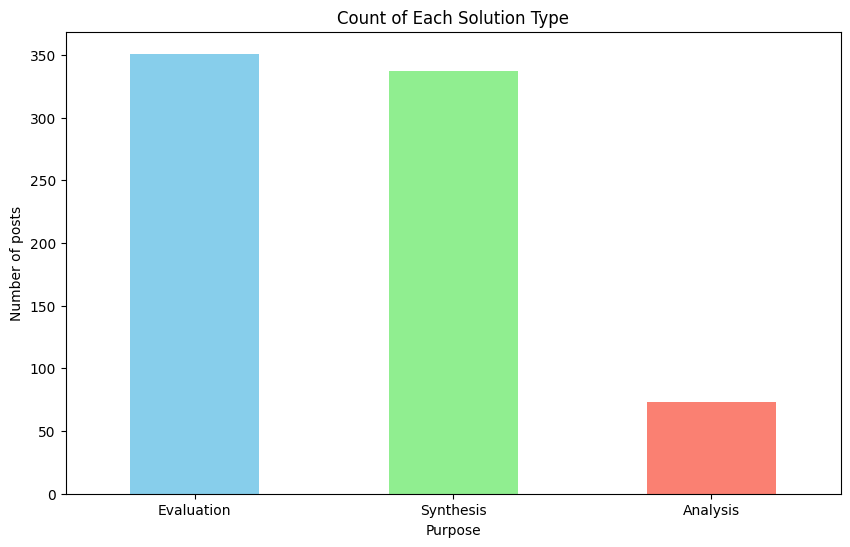

In [13]:
solution_counts = final_results['Purpose'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
solution_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Count of Each Solution Type')
plt.xlabel('Purpose')
plt.ylabel('Number of posts')
plt.xticks(rotation=0)  # Ensure the labels are horizontally aligned
plt.show()

<Figure size 1000x600 with 0 Axes>

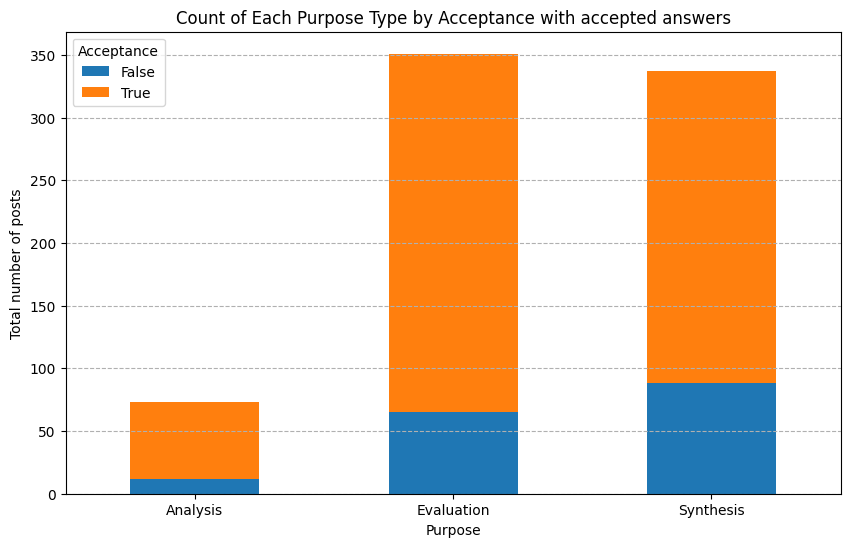

In [14]:
solution_counts = final_results.groupby(['Purpose', 'is_accepted']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
solution_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Count of Each Purpose Type by Acceptance with accepted answers')
plt.xlabel('Purpose')
plt.ylabel('Total number of posts')
plt.xticks(rotation=0)  # Ensure the labels are horizontally aligned
plt.legend(title='Acceptance', loc='upper left')
plt.grid(linestyle='--', axis='y')
plt.show()

In [18]:

save_as_excel(final_results, f"{DEFAULT_DATA_FOLDER}/output/architectural_posts_results.xlsx")
print("Completed")

Completed
